In [1]:
import sqlite3
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
db_loc = r"C:\Users\NoahLustig\Anaconda3\jupyter\glass_house_eda\glasshouse.db"
conn = sqlite3.connect(db_loc)
c = conn.cursor()

In [3]:
df = pd.read_sql('SELECT * FROM biopump', conn)

In [4]:
df.drop('index', axis=1, inplace=True)

Now we will clean the Bay column and remove any words before the number so that we can cast to an int.

In [5]:
regex = r'(\w+\s+)(\d{2})'
df['Bay'] = df['Bay'].replace(regex, r'\2', regex=True)

In [6]:
df.astype({'Bay':'int32'}, copy=False)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
0,2018-01-03 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,40.0,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586
1,2018-01-03 00:00:00,32,0.0,0.0,0.0,0.0,0.0,27.0,13.0,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996
2,2018-01-03 00:00:00,33,0.0,0.0,0.0,0.0,0.0,27.0,27.0,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,588
3,2018-01-03 00:00:00,34,0.0,13.0,0.0,0.0,0.0,27.0,27.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750
4,2018-01-03 00:00:00,35,0.0,13.0,0.0,0.0,0.0,0.0,27.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420
5,2018-01-03 00:00:00,36,0.0,13.0,0.0,0.0,0.0,0.0,0.0,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542
6,2018-07-31 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2949
7,2018-07-31 00:00:00,32,0.0,80.0,0.0,0.0,0.0,0.0,0.0,270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,986
8,2018-07-31 00:00:00,33,0.0,13.0,0.0,0.0,0.0,0.0,0.0,270,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1419
9,2018-09-10 00:00:00,31,0.0,0.0,0.0,0.0,0.0,27.0,0.0,1200,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,9140


First, we'll graph the total spore count for each of the bays as a bar graph.

In [7]:
print(type(df.loc[0,'Bay']))

<class 'str'>


In [8]:
b31 = df[df['Bay']=='31']

In [9]:
b31.head()

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
0,2018-01-03 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,40.0,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586
6,2018-07-31 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2949
9,2018-09-10 00:00:00,31,0.0,0.0,0.0,0.0,0.0,27.0,0.0,1200,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,9140
15,2018-10-02 00:00:00,31,170.0,13.0,0.0,0.0,0.0,0.0,0.0,670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1966
21,2018-10-16 00:00:00,31,0.0,27.0,0.0,0.0,0.0,0.0,0.0,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8834


Text(0.5, 0.98, 'Bay 31 Total Mold Spore Counts')

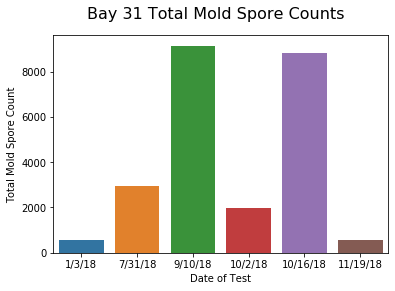

In [10]:
ax = sns.barplot(data=b31, x='Date', y='Total')
ax.set(xlabel='Date of Test',
      ylabel = 'Total Mold Spore Count',
      xticklabels = ['1/3/18',
                    '7/31/18',
                    '9/10/18',
                    '10/2/18',
                    '10/16/18',
                    '11/19/18',
                    '3/6/19',
                    '6/24/19',
                    '8/12/19'])
plt.suptitle('Bay 31 Total Mold Spore Counts', fontsize=16)

Now we'll do the same for each of the other bays.

In [11]:
b32 = df[df['Bay']=='32']
b33 = df[df['Bay']=='33']
b34 = df[df['Bay']=='34']
b35 = df[df['Bay']=='35']
b36 = df[df['Bay']=='36']

In [12]:
b32.head(20)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
1,2018-01-03 00:00:00,32,0.0,0.0,0.0,0.0,0.0,27.0,13.0,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996
7,2018-07-31 00:00:00,32,0.0,80.0,0.0,0.0,0.0,0.0,0.0,270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,986
10,2018-09-10 00:00:00,32,0.0,40.0,0.0,0.0,13.0,13.0,0.0,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6006
16,2018-10-02 00:00:00,32,0.0,13.0,0.0,0.0,0.0,0.0,0.0,470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3835
22,2018-10-16 00:00:00,32,0.0,13.0,0.0,0.0,0.0,0.0,13.0,530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7680
28,2018-11-19 00:00:00,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430
33,2019-03-06 00:00:00,32,0.0,0.0,0.0,0.0,0.0,730.0,0.0,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5860
35,2019-06-24 00:00:00,32,0.0,0.0,0.0,0.0,0.0,1100.0,0.0,27000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28230
36,2019-06-24 00:00:00,32,0.0,53.0,0.0,0.0,0.0,830.0,0.0,7800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9736
38,2019-08-12 00:00:00,32,0.0,40.0,0.0,0.0,0.0,470.0,0.0,2700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4759


Text(0.5, 0.98, 'Bay 32 Total Mold Spore Counts')

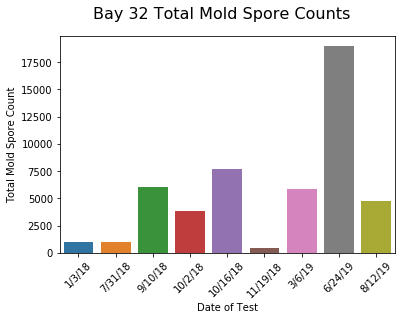

In [13]:

ax = sns.barplot(data=b32, x='Date', y='Total', ci=None)
ax.set(xlabel='Date of Test',
      ylabel = 'Total Mold Spore Count')

ax.set_xticklabels(['1/3/18',
                    '7/31/18',
                    '9/10/18',
                    '10/2/18',
                    '10/16/18',
                    '11/19/18',
                    '3/6/19',
                    '6/24/19',
                    '8/12/19'], rotation=45)
plt.suptitle('Bay 32 Total Mold Spore Counts', fontsize=16)

In [14]:
b33.head(20)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
2,2018-01-03 00:00:00,33,0.0,0.0,0.0,0.0,0.0,27.0,27.0,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,588
8,2018-07-31 00:00:00,33,0.0,13.0,0.0,0.0,0.0,0.0,0.0,270,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1419
11,2018-09-10 00:00:00,33,0.0,13.0,0.0,0.0,0.0,0.0,0.0,600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2813
17,2018-10-02 00:00:00,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,949
23,2018-10-16 00:00:00,33,0.0,80.0,0.0,0.0,0.0,67.0,0.0,470,...,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10790
29,2018-11-19 00:00:00,33,0.0,0.0,0.0,0.0,0.0,27.0,0.0,130,...,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,809


Text(0.5, 0.98, 'Bay 33 Total Mold Spore Counts')

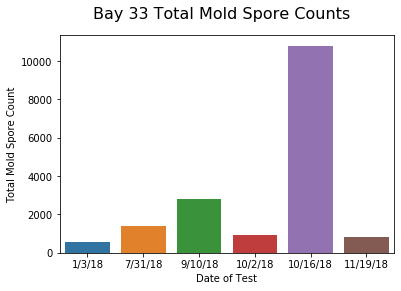

In [15]:
ax = sns.barplot(data=b33, x='Date', y='Total')
ax.set(xlabel='Date of Test',
      ylabel = 'Total Mold Spore Count',
      xticklabels = ['1/3/18',
                    '7/31/18',
                    '9/10/18',
                    '10/2/18',
                    '10/16/18',
                    '11/19/18'])
plt.suptitle('Bay 33 Total Mold Spore Counts', fontsize=16)

In [16]:
b34.head(20)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
3,2018-01-03 00:00:00,34,0.0,13.0,0.0,0.0,0.0,27.0,27.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750
12,2018-09-10 00:00:00,34,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6826
18,2018-10-02 00:00:00,34,0.0,27.0,0.0,0.0,0.0,110.0,0.0,670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600
24,2018-10-16 00:00:00,34,0.0,27.0,0.0,0.0,27.0,67.0,0.0,67,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7221
30,2018-11-19 00:00:00,34,0.0,27.0,0.0,0.0,0.0,13.0,0.0,130,...,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,824
37,2019-06-24 00:00:00,34,0.0,0.0,0.0,0.0,0.0,870.0,0.0,15000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17060


Text(0.5, 0.98, 'Bay 34 Total Mold Spore Counts')

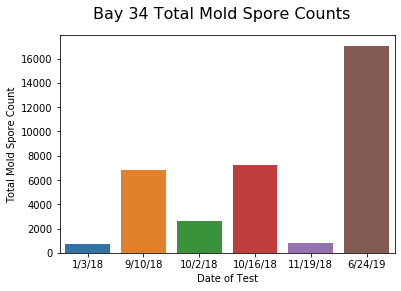

In [17]:
ax = sns.barplot(data=b34, x='Date', y='Total')
ax.set(xlabel='Date of Test',
      ylabel = 'Total Mold Spore Count',
      xticklabels = ['1/3/18',
                    '9/10/18',
                    '10/2/18',
                    '10/16/18',
                    '11/19/18',
                    '6/24/19'])
plt.suptitle('Bay 34 Total Mold Spore Counts', fontsize=16)

In [18]:
b35.head(20)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
4,2018-01-03 00:00:00,35,0.0,13.0,0.0,0.0,0.0,0.0,27.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420
13,2018-09-10 00:00:00,35,0.0,13.0,0.0,0.0,0.0,0.0,13.0,1200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2436
19,2018-10-02 00:00:00,35,0.0,0.0,0.0,0.0,0.0,67.0,0.0,200,...,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,2580
25,2018-10-16 00:00:00,35,0.0,80.0,0.0,0.0,0.0,27.0,0.0,670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7727
31,2018-11-19 00:00:00,35,0.0,0.0,0.0,0.0,0.0,53.0,0.0,130,...,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,863
34,2019-03-06 00:00:00,35,0.0,0.0,0.0,0.0,0.0,470.0,0.0,4000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5093
39,2019-08-12 00:00:00,35,0.0,13.0,0.0,0.0,0.0,400.0,0.0,1700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3110


Text(0.5, 0.98, 'Bay 35 Total Mold Spore Counts')

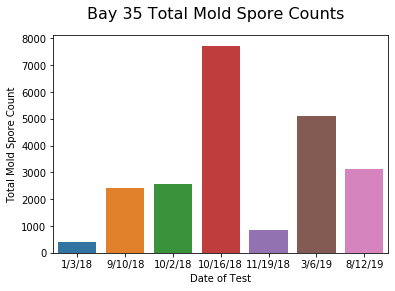

In [19]:
ax = sns.barplot(data=b35, x='Date', y='Total')
ax.set(xlabel='Date of Test',
      ylabel = 'Total Mold Spore Count',
      xticklabels = ['1/3/18',
                    '9/10/18',
                    '10/2/18',
                    '10/16/18',
                    '11/19/18',
                    '3/6/19',
                    '8/12/19'])
plt.suptitle('Bay 35 Total Mold Spore Counts', fontsize=16)

In [20]:
b36.head(20)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
5,2018-01-03 00:00:00,36,0.0,13.0,0.0,0.0,0.0,0.0,0.0,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542
14,2018-09-10 00:00:00,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4492
20,2018-10-02 00:00:00,36,0.0,40.0,0.0,0.0,0.0,0.0,0.0,400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2675
26,2018-10-16 00:00:00,36,0.0,67.0,0.0,0.0,0.0,67.0,0.0,270,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8913
32,2018-11-19 00:00:00,36,0.0,0.0,0.0,0.0,0.0,13.0,0.0,67,...,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,613


Text(0.5, 0.98, 'Bay 36 Total Mold Spore Counts')

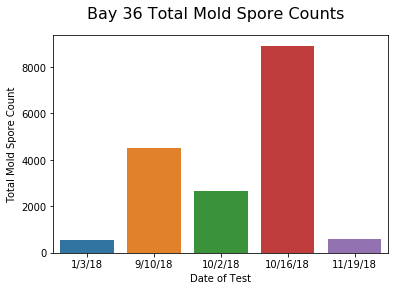

In [21]:
ax = sns.barplot(data=b36, x='Date', y='Total')
ax.set(xlabel='Date of Test',
      ylabel = 'Total Mold Spore Count',
      xticklabels = ['1/3/18',
                    '9/10/18',
                    '10/2/18',
                    '10/16/18',
                    '11/19/18'])
plt.suptitle('Bay 36 Total Mold Spore Counts', fontsize=16)

Now we're going to make bar charts for each test day showing the total mold spore counts for each of the bays tested on that day.

In [31]:
print(df['Date'].unique())

['2018-01-03 00:00:00' '2018-07-31 00:00:00' '2018-09-10 00:00:00'
 '2018-10-02 00:00:00' '2018-10-16 00:00:00' '2018-11-19 00:00:00'
 '2019-03-06 00:00:00' '2019-06-24 00:00:00' '2019-08-12 00:00:00']


In [32]:
test1 = df[df['Date']=='2018-01-03 00:00:00']
test2 = df[df['Date']=='2018-07-31 00:00:00']
test3= df[df['Date']=='2018-09-10 00:00:00']
test4 = df[df['Date']=='2018-10-02 00:00:00']
test5 = df[df['Date']=='2018-10-16 00:00:00']
test6 = df[df['Date']=='2018-11-19 00:00:00']
test7 = df[df['Date']=='2019-03-06 00:00:00']
test8 = df[df['Date']=='2019-06-24 00:00:00']
test9 = df[df['Date']=='2019-08-12 00:00:00']

In [34]:
test1.head(20)

,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,Basidiospores,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
0,2018-01-03 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,40.0,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586
1,2018-01-03 00:00:00,32,0.0,0.0,0.0,0.0,0.0,27.0,13.0,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996
2,2018-01-03 00:00:00,33,0.0,0.0,0.0,0.0,0.0,27.0,27.0,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,588
3,2018-01-03 00:00:00,34,0.0,13.0,0.0,0.0,0.0,27.0,27.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750
4,2018-01-03 00:00:00,35,0.0,13.0,0.0,0.0,0.0,0.0,27.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420
5,2018-01-03 00:00:00,36,0.0,13.0,0.0,0.0,0.0,0.0,0.0,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542


Text(0.5, 0.98, 'Biopump Test Results-1/3/18')

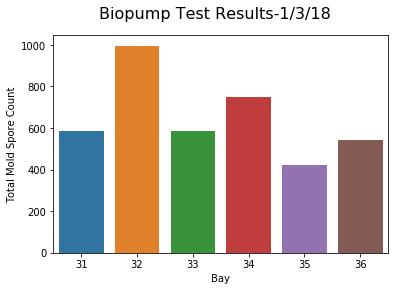

In [36]:
ax = sns.barplot(data=test1, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-1/3/18', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-7/31/18')

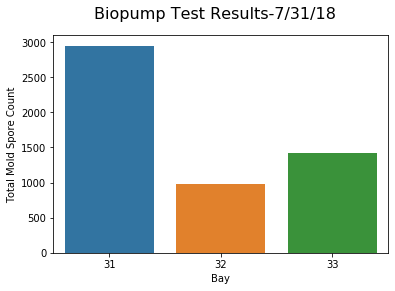

In [37]:
ax = sns.barplot(data=test2, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-7/31/18', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-9/10/18')

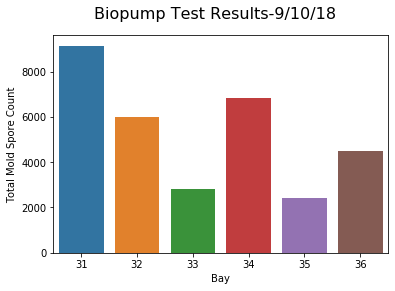

In [38]:
ax = sns.barplot(data=test3, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-9/10/18', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-10/2/18')

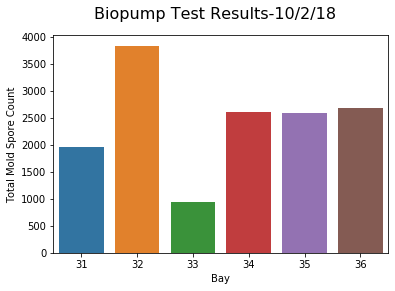

In [39]:
ax = sns.barplot(data=test4, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-10/2/18', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-10/16/18')

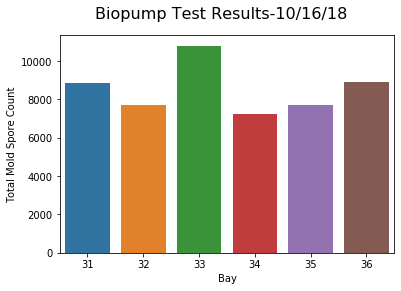

In [40]:
ax = sns.barplot(data=test5, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-10/16/18', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-11/19/18')

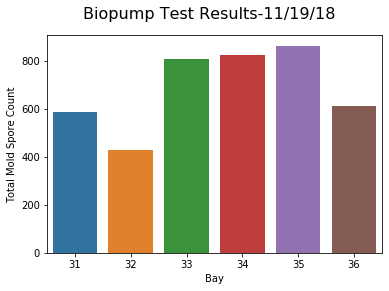

In [41]:
ax = sns.barplot(data=test6, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-11/19/18', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-3/6/19')

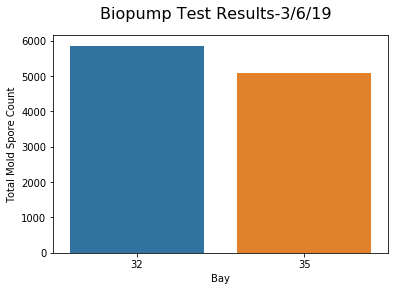

In [42]:
ax = sns.barplot(data=test7, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-3/6/19', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-6/24/19')

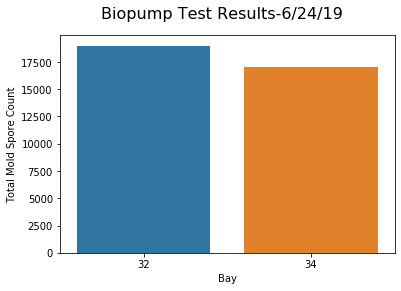

In [44]:
ax = sns.barplot(data=test8, x='Bay', y='Total', ci=None)
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-6/24/19', fontsize=16)

Text(0.5, 0.98, 'Biopump Test Results-8/12/19')

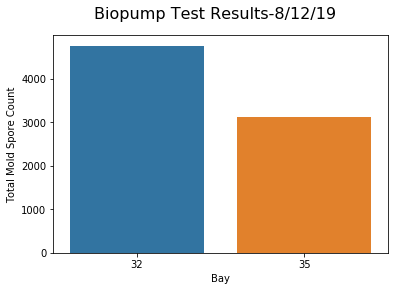

In [45]:
ax = sns.barplot(data=test9, x='Bay', y='Total')
ax.set(xlabel='Bay',
      ylabel = 'Total Mold Spore Count')
plt.suptitle('Biopump Test Results-8/12/19', fontsize=16)